# Preview dataset

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/car_price.csv")

In [72]:
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.90,55,4800,45,50,7099.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
145,146,0,subaru r2,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.70,111,4800,24,29,11259.0
25,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.60,58,4800,49,54,6479.0
180,181,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.35,9.20,156,5200,20,24,15690.0
124,125,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.00,145,5000,19,24,12764.0
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,90,5100,23,31,9895.0
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0
26,27,1,dodge colt (sw),gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,7609.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 10 categorical columns in the dataset. We may later apply encoding or mapping for these columns

Numerical columns are 16, these will go directly into modeling after scaling. Some are likely correlated and we will analyze this in EDA

In [74]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


price is the target for the model y = df['price']

we will have an overview of price first

c:\Users\tam.hoangthanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


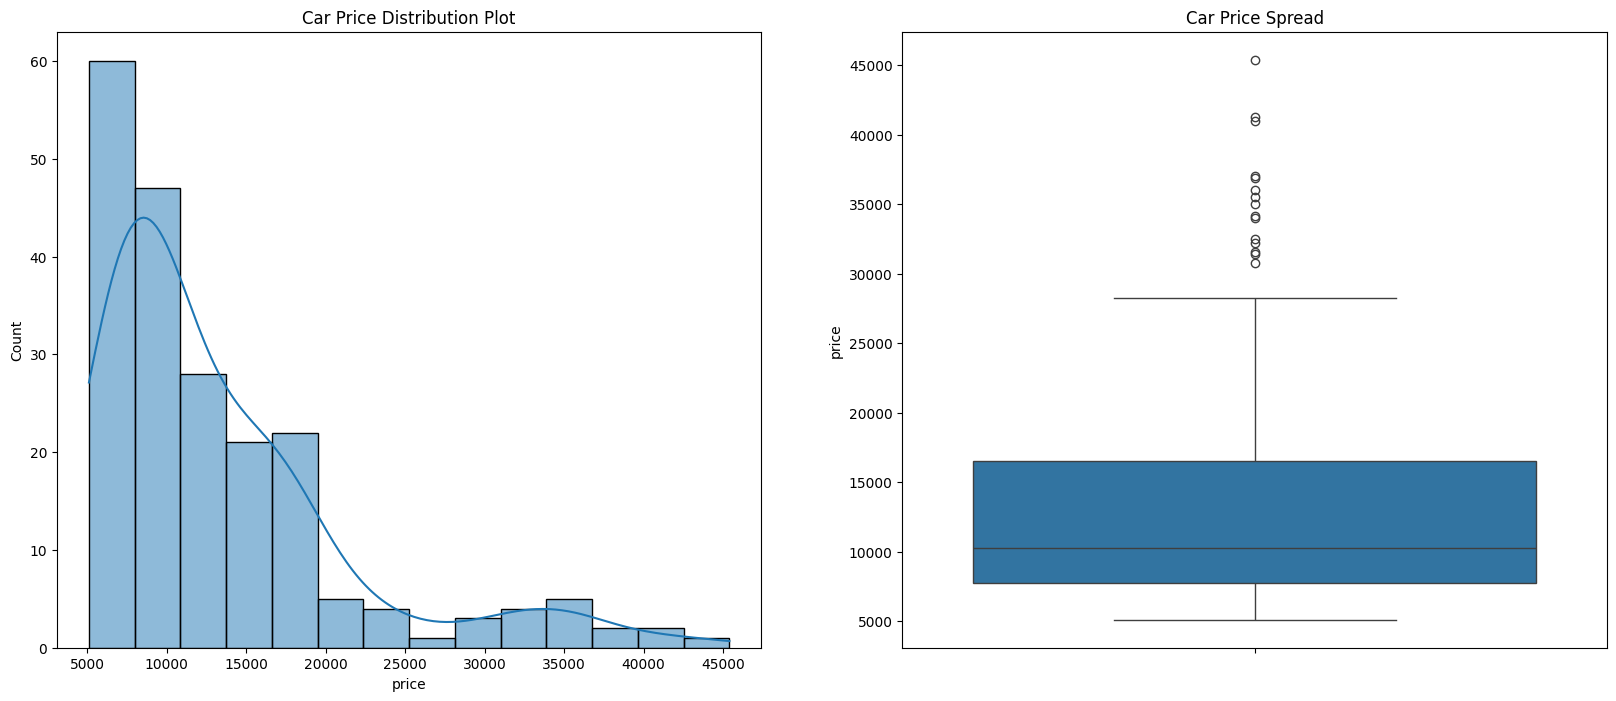

In [75]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df['price'], kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['price'])

plt.show()

the distribution of the price is right skewed, not normally distrbuted. Price is mainly in the range of 5,000 - 18,000

there are outliers beyond 30,000

# Data cleaning and preparation

In [76]:
# extract car brand from car name

df['carbrand'] = df['CarName'].str.lower().str.split(' ', expand=True)[0]
replace_dict = {
    'porcshce': 'porsche',
    'maxda': 'mazda',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}
df['carbrand'] = df['carbrand'].replace(replace_dict)


In [77]:
# preview outliers of numeric columns
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        
        outlier_summary.append({
            'Column': col,
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'Lower Bound': round(lower, 2),
            'Upper Bound': round(upper, 2),
            'Outlier Count': outliers.count(),
            'Total Count': df[col].count(),
            'Outlier %': round((outliers.count() / df[col].count()) * 100, 2)
        })

    return pd.DataFrame(outlier_summary)
outlier_table = detect_outliers_iqr(df)
outlier_table

,Column,Q1,Q3,Lower Bound,Upper Bound,Outlier Count,Total Count,Outlier %
0,car_ID,52.00,154.00,-101.00,307.00,0,205,0.00
1,symboling,0.00,2.00,-3.00,5.00,0,205,0.00
2,wheelbase,94.50,102.40,82.65,114.25,3,205,1.46
3,carlength,166.30,183.10,141.10,208.30,1,205,0.49
4,carwidth,64.10,66.90,59.90,71.10,8,205,3.90
5,carheight,52.00,55.50,46.75,60.75,0,205,0.00
6,curbweight,2145.00,2935.00,960.00,4120.00,0,205,0.00
7,enginesize,97.00,141.00,31.00,207.00,10,205,4.88
8,boreratio,3.15,3.58,2.50,4.23,0,205,0.00
9,stroke,3.11,3.41,2.66,3.86,20,205,9.76


There are outliers in the dataset, we will EDA and decide what to do with them

In [78]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [79]:
#remove unused columns
df.drop(['CarName', 'car_ID'], axis=1, inplace=True)

# EDA

- Check the target variable (price)
- Check for correlation between numeric features vs. price
- Check for Categorical features vs. price
- Check for multicollinearity

## Target variable (price)

c:\Users\tam.hoangthanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


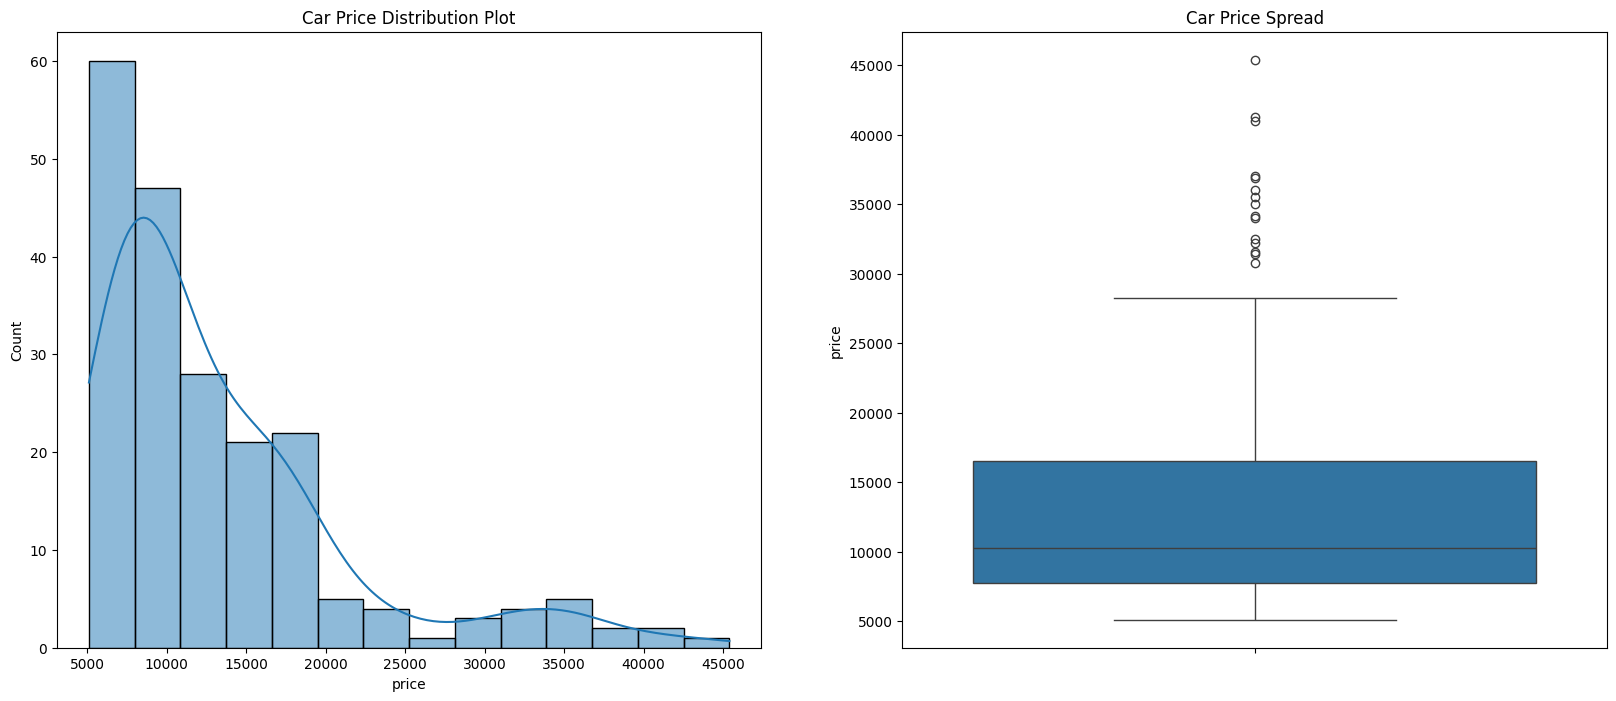

In [80]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df['price'], kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['price'])

plt.show()

In [81]:
print(df.price.describe())
price_outliers = detect_outliers_iqr(df[['price']])
print(price_outliers)

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64
  Column      Q1       Q3  Lower Bound  Upper Bound  Outlier Count  \
0  price  7788.0  16503.0      -5284.5      29575.5             15   

   Total Count  Outlier %  
0          205       7.32  


There are 15 outliers which consist of 7.3% of the data

## Numeric variables vs. price - Correlation

In [82]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]


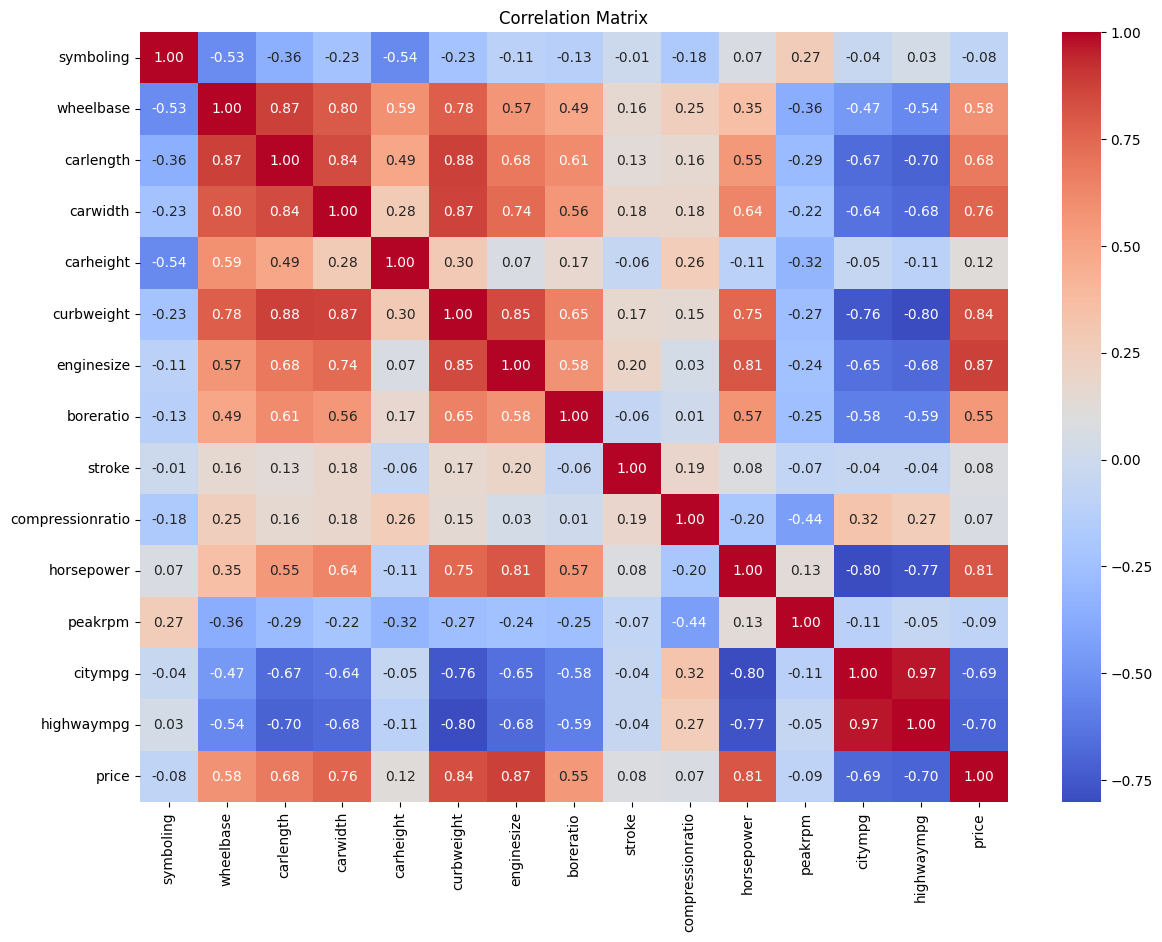

In [83]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

plt.figure(figsize=(14, 10))
corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

There are variables with little impacts on price, we can remove them in our model. 

The features we can keep are:
- wheelbase 
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower
- citympg
- highwaympg

There are also multicollinearity in the model, we will dive deeper into them and decide what to do with them

In [84]:
numeric_columns_keep = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

## Multicollinearity check

In the heatmap above, we can see see the multicollinearity features are: 
- carlength and wheelbase
- carwidth and wheelbase
- carwidth and carlength
- curbweight and carlength
- curbweight and carwidth
- enginesize and curbweight
- enginesize and horsepower
- citympg and highwaympg
- citympg and horsepower
- highwaympg and curbweight

In [85]:
# use VIF to check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric independent variables (exclude 'price' as it's the target)
X = df[numeric_columns_keep]

# Add constant for intercept
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

      Feature          VIF
0       const  3271.689403
8     citympg    25.333385
9  highwaympg    23.793782
4  curbweight    12.706890
2   carlength     8.784091
1   wheelbase     6.454355
7  horsepower     6.415460
5  enginesize     5.381689
3    carwidth     5.168046
6   boreratio     1.854408


remove features: 'citympg','curbweight','horsepower','carwidth','wheelbase'

then check for multicollinearity again

In [86]:
numeric_columns_remove = ['citympg','curbweight','horsepower','carwidth','wheelbase']

for i in numeric_columns_remove:
    numeric_columns_keep.remove(i)
numeric_columns_keep

['carlength', 'enginesize', 'boreratio', 'highwaympg']

In [87]:
df_mul_test = df_numeric[numeric_columns_keep]

# Add constant for intercept
X = add_constant(df_mul_test)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

      Feature         VIF
0       const  749.093060
1   carlength    2.500716
4  highwaympg    2.409509
2  enginesize    2.288311
3   boreratio    1.797228


no more VIF values greater than 5

## Categorical features vs. price

In [88]:
#check unique values in each column
categorical_cols = df.select_dtypes(include='object').columns
df_categorical = df[categorical_cols]
df_categorical.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
carbrand          22
dtype: int64

carbrand has 22 unique values, we need to group them into categories

There are not many unique values in the remaining features, so we can keep theem. 

In [89]:
brand_mapping = {
    'toyota': 'economy', 'nissan': 'economy', 'mazda': 'economy', 'mitsubishi': 'economy',
    'honda': 'economy', 'volkswagen': 'economy', 'subaru': 'economy', 'peugeot': 'economy',
    'volvo': 'luxury', 'dodge': 'off-road', 'buick': 'economy', 'bmw': 'luxury',
    'audi': 'luxury', 'plymouth': 'other', 'saab': 'luxury', 'porsche': 'luxury',
    'isuzu': 'other', 'jaguar': 'luxury', 'chevrolet': 'economy', 'alfa-romero': 'other',
    'renault': 'other', 'mercury': 'other'
}

df['carbrand'] = df['carbrand'].apply(lambda x: brand_mapping.get(x.split(' ')[0].lower(), 'other'))

print(df['carbrand'].value_counts())

carbrand
economy     139
luxury       40
other        17
off-road      9
Name: count, dtype: int64


In [90]:
#check for mean of price group by each categorical column so that we can see if they have any impact on price
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)['price'].mean().sort_values(ascending=False))


--- fueltype ---
fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

--- aspiration ---
aspiration
turbo    16298.166676
std      12611.270833
Name: price, dtype: float64

--- doornumber ---
doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

--- carbody ---
carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14344.270833
wagon          12371.960000
hatchback      10376.652386
Name: price, dtype: float64

--- drivewheel ---
drivewheel
rwd    19910.809211
4wd    11087.463000
fwd     9239.308333
Name: price, dtype: float64

--- enginelocation ---
enginelocation
rear     34528.000000
front    12961.097361
Name: price, dtype: float64

--- enginetype ---
enginetype
dohcv    31400.500000
ohcv     25098.384615
dohc     18116.416667
l        14627.583333
ohcf     13738.600000
rotor    13020.000000
ohc      11574.048426
Name: price, dtype: float64

--- cylindernumber ---
cylindernumber
eight     37400.100000
t

doornumber doesn't have much impact on price

In [91]:
#ANOVA table using sm and ols
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in categorical_cols:
    model = ols(f'price ~ C({col})', data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {col}')
    print(anova)
    print('\n')

ANOVA for fueltype
                   sum_sq     df         F    PR(>F)
C(fueltype)  1.454053e+08    1.0  2.292741  0.131536
Residual     1.287423e+10  203.0       NaN       NaN


ANOVA for aspiration
                     sum_sq     df         F  PR(>F)
C(aspiration)  4.121724e+08    1.0  6.636622  0.0107
Residual       1.260747e+10  203.0       NaN     NaN


ANOVA for doornumber
                     sum_sq     df         F    PR(>F)
C(doornumber)  1.319520e+07    1.0  0.205946  0.650448
Residual       1.300644e+10  203.0       NaN       NaN


ANOVA for carbody
                  sum_sq     df         F    PR(>F)
C(carbody)  1.801997e+09    4.0  8.031976  0.000005
Residual    1.121764e+10  200.0       NaN       NaN


ANOVA for drivewheel
                     sum_sq     df          F        PR(>F)
C(drivewheel)  5.344065e+09    2.0  70.320553  6.632887e-24
Residual       7.675574e+09  202.0        NaN           NaN


ANOVA for enginelocation
                         sum_sq     df        

p < 0.05 → the feature has a statistically significant impact on price ✅

p > 0.05 → may not be helpful ❌

fueltype and doornumber are not statistically significant

In [108]:
categorical_columns_keep = ['aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','carbrand']

# Feature Engineering

## Categorical featuress

Use one-hot encoding

In [109]:
columns_keep = numeric_columns_keep + categorical_columns_keep + ['price']
df_keep = df[columns_keep]
df_keep = pd.get_dummies(df_keep, columns=categorical_columns_keep, drop_first=True)
df_keep = df_keep.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

df_keep

,carlength,enginesize,boreratio,highwaympg,price,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carbrand_luxury,carbrand_off-road,carbrand_other
0,168.8,130,3.47,27,13495.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,168.8,130,3.47,27,16500.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,171.2,152,2.68,26,16500.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,176.6,109,3.19,30,13950.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,176.6,136,3.19,22,17450.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,141,3.78,28,16845.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
201,188.8,141,3.78,25,19045.0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
202,188.8,173,3.58,23,21485.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
203,188.8,145,3.01,27,22470.0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## Numeric features

StandardScaler - standardize features by removing the mean and scaling to unit variance. We have different unit in our features, so we need to scale them.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_keep[numeric_columns_keep] = scaler.fit_transform(df_keep[numeric_columns_keep])
df_keep

,carlength,enginesize,boreratio,highwaympg,price,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carbrand_luxury,carbrand_off-road,carbrand_other
0,-0.426521,0.074449,0.519071,-0.546059,13495.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.426521,0.074449,0.519071,-0.546059,16500.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.231513,0.604046,-2.404880,-0.691627,16500.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.207256,-0.431076,-0.517266,-0.109354,13950.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0.207256,0.218885,-0.517266,-1.273900,17450.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.198549,0.339248,1.666445,-0.400490,16845.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
201,1.198549,0.339248,1.666445,-0.837195,19045.0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
202,1.198549,1.109571,0.926204,-1.128332,21485.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
203,1.198549,0.435538,-1.183483,-0.546059,22470.0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## Split data

We have a small dataset, only 200 rows, so we'll use K-Fold Cross Validation

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

X = df_keep.drop('price', axis=1)
y = df_keep['price']

model = LinearRegression()
model.fit(X, y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", np.mean(scores))

Cross-Validation R² Scores: [0.85000196 0.77975667 0.92186407 0.83581566 0.93632208]
Average R² Score: 0.8647520870544982


Individual scores is consistently high and show low variance -> the model is stable and generalizes well, no overfitting or underfitting

R2 score is 0.86 which implies that the model can explain 86% of the variability in car prices

# Train Model & Interpret 

## Train model and check coefficients

In [140]:
model = LinearRegression()
model.fit(X, y)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


                  Feature   Coefficient
11    enginelocation_rear   7282.102805
1              enginesize   5279.320730
31        carbrand_luxury   3960.270395
15        enginetype_ohcf   2707.047181
4        aspiration_turbo   2561.890572
10         drivewheel_rwd   2339.785245
14         enginetype_ohc   1634.029465
13           enginetype_l   1570.478081
0               carlength    368.376903
9          drivewheel_fwd    272.726223
26         fuelsystem_idi    -11.686668
33         carbrand_other   -198.207528
23     cylindernumber_two   -299.857581
17       enginetype_rotor   -299.857581
30        fuelsystem_spfi   -312.525134
24        fuelsystem_2bbl   -331.368695
3              highwaympg   -333.440319
28        fuelsystem_mpfi   -350.149370
32      carbrand_off-road   -494.219357
2               boreratio   -875.520707
12       enginetype_dohcv  -2417.343399
29        fuelsystem_spdi  -2559.207061
25        fuelsystem_4bbl  -2579.279504
16        enginetype_ohcv  -2694.273089


Features related to performance and luxury (like turbo, big engines, rear engine) drive price up.

Economy configurations (e.g., front-wheel drive, fuel efficiency, certain fuel systems) tend to lower the price.

The model has interpretable, logical results

## Residuals check

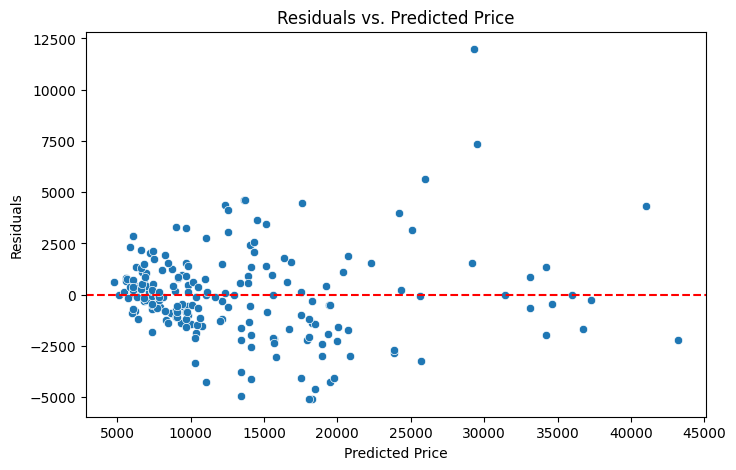

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the training set (full data, since we trained on full data)
y_pred = model.predict(X)
residuals = y - y_pred

# Scatter plot: predicted vs residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Price")
plt.show()


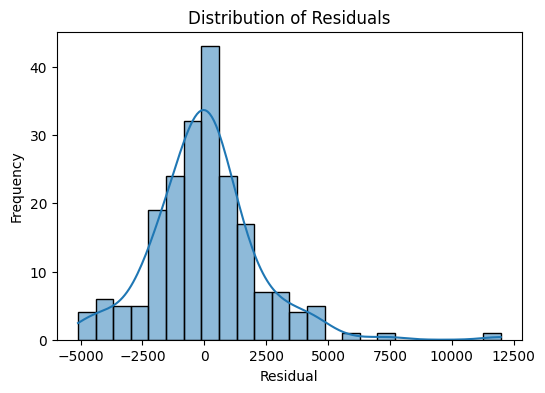

In [117]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

the distributions is bell curve at 0 but the scatter plot is fan shaped

The variance of errors increases with the predicted value.

=> we will try to improve the model with some experiments

## Experiment to try to improve the model

### Trying transformation methods

- log transformation
- square root transformation
- box-cox transformation
- yeo-johnson transformation

In [122]:
from sklearn.preprocessing import PowerTransformer
from scipy import stats

y_log = np.log(y)

y_sqrt = np.sqrt(y)

y_pos = y + 1
y_boxcox, lambda_ = stats.boxcox(y_pos)

scaler = PowerTransformer(method='yeo-johnson')
y_yeo = scaler.fit_transform(y.values.reshape(-1, 1)) 

log_model = LinearRegression()
sqrt_model = LinearRegression()
boxcox_model = LinearRegression()
yeo_model = LinearRegression()

log_model.fit(X, y_log)
sqrt_model.fit(X, y_sqrt)
boxcox_model.fit(X, y_boxcox)
yeo_model.fit(X, y_yeo)

log_r2_scores = cross_val_score(log_model, X, y_log, cv=5, scoring='r2')
sqrt_r2_scores = cross_val_score(sqrt_model, X, y_sqrt, cv=5, scoring='r2')
boxcox_r2_scores = cross_val_score(boxcox_model, X, y_boxcox, cv=5, scoring='r2')
yeo_r2_scores = cross_val_score(yeo_model, X, y_yeo, cv=5, scoring='r2')

print("Cross-Validation R² Scores (Log Target):", log_r2_scores)
print("Average R² Score (Log Target):", log_r2_scores.mean())

print("Square Root Transformation R² Scores:", sqrt_r2_scores)
print("Average R² Score (Square Root):", sqrt_r2_scores.mean())

print("Box-Cox Transformation R² Scores:", boxcox_r2_scores)
print("Average R² Score (Box-Cox):", boxcox_r2_scores.mean())

print("Yeo-Johnson Transformation R² Scores:", yeo_r2_scores)
print("Average R² Score (Yeo-Johnson):", yeo_r2_scores.mean())

Square Root Transformation R² Scores: [0.84330224 0.77961198 0.71947521 0.6464002  0.0962319 ]
Average R² Score (Square Root): 0.6170043027155481
Box-Cox Transformation R² Scores: [0.93667436 0.73791256 0.83743198 0.83033244 0.17162961]
Average R² Score (Box-Cox): 0.7027961905985549
Yeo-Johnson Transformation R² Scores: [0.93667436 0.73791256 0.83743198 0.83033244 0.1716296 ]
Average R² Score (Yeo-Johnson): 0.7027961873291132


None of the transformation methods produce better results than the original data

### Trying regularization methods

- Ridge Regression
- Lasso Regression

In [123]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Initialize models with regularization
ridge_model = Ridge(alpha=1.0)  # L2 regularization
lasso_model = Lasso(alpha=0.1)  # L1 regularization

# Train the models
ridge_model.fit(X, y)
lasso_model.fit(X, y)

# Evaluate models with cross-validation (5-fold)
ridge_r2_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
lasso_r2_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')

# Output R2 scores for both models
ridge_avg_r2 = ridge_r2_scores.mean()
lasso_avg_r2 = lasso_r2_scores.mean()

print("Ridge Regression R² Scores:", ridge_r2_scores)
print("Average R² Score (Ridge):", ridge_avg_r2)

print("Lasso Regression R² Scores:", lasso_r2_scores)
print("Average R² Score (Lasso):", lasso_avg_r2)


Ridge Regression R² Scores: [ 0.80001018  0.74963341  0.43974389  0.62434641 -0.38854488]
Average R² Score (Ridge): 0.4450378024000692
Lasso Regression R² Scores: [ 0.73273038  0.71169437  0.52365265  0.45189107 -0.25150762]
Average R² Score (Lasso): 0.43369216858237836


c:\Users\tam.hoangthanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+08, tolerance: 1.302e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\tam.hoangthanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+07, tolerance: 1.003e+06
  model = cd_fast.enet_coordinate_descent(


They both did not produce better results

# Final model evaluation

It seems that the other methods did not produce better results than the original model so we will use the original model for the final evaluation.

General performance

In [137]:
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", r2_scores)
print("Average R² Score:", np.mean(r2_scores))


Cross-Validation R² Scores: [ 0.73225695  0.71632039  0.47742567  0.45212333 -0.25229075]
Average R² Score: 0.42516711808985513


Overall Prediction Accuracy

In [138]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_cv = cross_val_predict(model, X, y, cv=5)

r2 = r2_score(y, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
mae = mean_absolute_error(y, y_pred_cv)

print(f"Overall R² from cross_val_predict: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Overall R² from cross_val_predict: 0.6114
RMSE: 4968.14
MAE: 3435.39


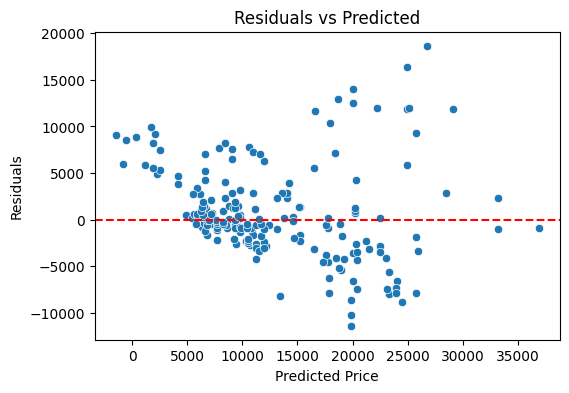

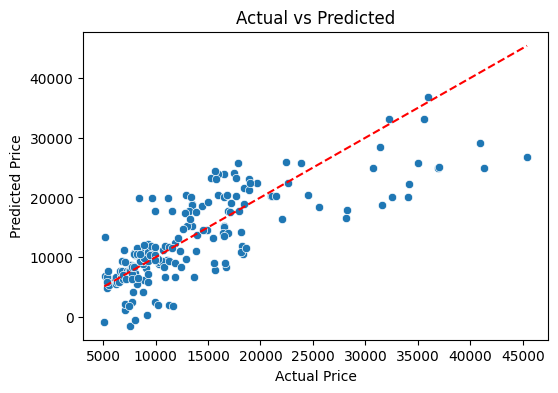

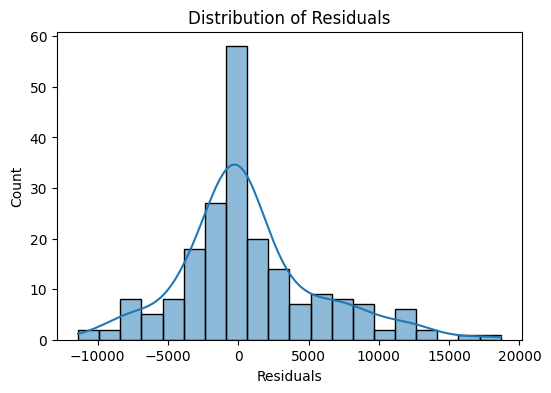

In [139]:
# Residuals
residuals = y - y_pred_cv

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_cv, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred_cv)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


The final linear regression model achieved an average R² of 0.865 across 5-fold cross-validation, indicating strong generalization ability. 

The average prediction error is approximately $4,968 (RMSE) and $3,435 (MAE). 

The residuals appear approximately normally distributed, but with some fan-shaped variance — suggesting minor heteroscedasticity. 